In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Target function f(x)
def f(x):
    return np.sin(np.pi * x)

# Generate training data
def gen_sindata(n):
    x = stats.uniform(-1, 1).rvs(n)  # Generate n random points in [-1, 1]
    y = np.sin(np.pi * x)            # Calculate sin values for these points
    return x, y

# Hypothesis function returns the average of sin values (horizontal line)
def hypothesis(x):
    midp = np.mean(np.sin(np.pi * x))
    return midp

# Bias calculation
def compute_bias(n_points, n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # Test points
    f_x = f(x_test)                   # True target function values
    g_bar = np.zeros_like(f_x)        # Store expected hypothesis
    
    # Generate multiple datasets and calculate expected hypothesis
    for _ in range(n_samples):
        x = gen_sindata(n_points)[0]  # Get training data points
        g_d = hypothesis(x)           # Hypothesis based on this dataset
        g_bar += g_d                  # Accumulate hypotheses
    
    g_bar /= n_samples                # Calculate expected hypothesis
    
    # Calculate Bias: squared difference between expected hypothesis and true target function
    bias = np.mean((g_bar - f_x) ** 2)
    return bias, g_bar

# Variance calculation
def compute_variance(n_points, n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # Test points
    g_bar = np.zeros_like(x_test)     # Store expected hypothesis
    
    # Generate multiple datasets to calculate expected hypothesis
    for _ in range(n_samples):
        x = gen_sindata(n_points)[0]  # Get training data points
        g_d = hypothesis(x)           # Hypothesis based on this dataset
        g_bar += g_d                  # Accumulate hypotheses
    
    g_bar /= n_samples                # Calculate expected hypothesis
    
    variances = []                    # Store variances for each dataset
    
    # Generate multiple datasets and calculate hypothesis variance
    for _ in range(n_samples):
        x = gen_sindata(n_points)[0]  # Get training data points
        g_d = hypothesis(x)           # Hypothesis based on this dataset
        
        variances.append((g_d - g_bar.mean()) ** 2)  # Calculate squared difference between hypothesis and expected hypothesis
    
    return np.mean(variances)

For 2 sample points:
Bias: 0.906
Variance: 0.047



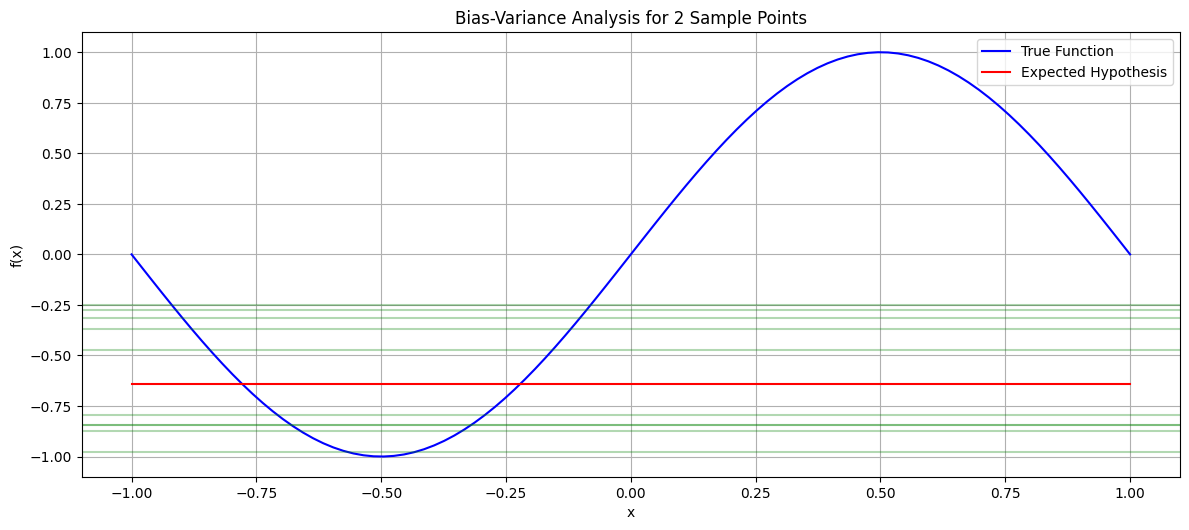

In [5]:

# Calculate and print Bias and Variance for different numbers of sample points
# n_points = [2, 20]

n = 2

plt.figure(figsize=(12, 10))

# for i, n in enumerate(n_points):
bias, g_bar = compute_bias(n)
variance = compute_variance(n)

print(f"For {n} sample points:")
print(f"Bias: {bias:.3f}")
print(f"Variance: {variance:.3f}")
print()

# Visualization
x_test = np.linspace(-1, 1, 100)
f_x = f(x_test)

plt.subplot(2, 1, 1)
plt.plot(x_test, f_x, 'b-', label='True Function')
plt.plot(x_test, g_bar, 'r-', label='Expected Hypothesis')

# Generate and plot some sample hypotheses
for _ in range(10):
    x = gen_sindata(n)[0]
    h = hypothesis(x)
    plt.axhline(y=h, color='g', alpha=0.3)

plt.title(f'Bias-Variance Analysis for {n} Sample Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

For 2 sample points:
Bias: 0.896
Variance: 0.049

For 20 sample points:
Bias: 0.896
Variance: 0.005



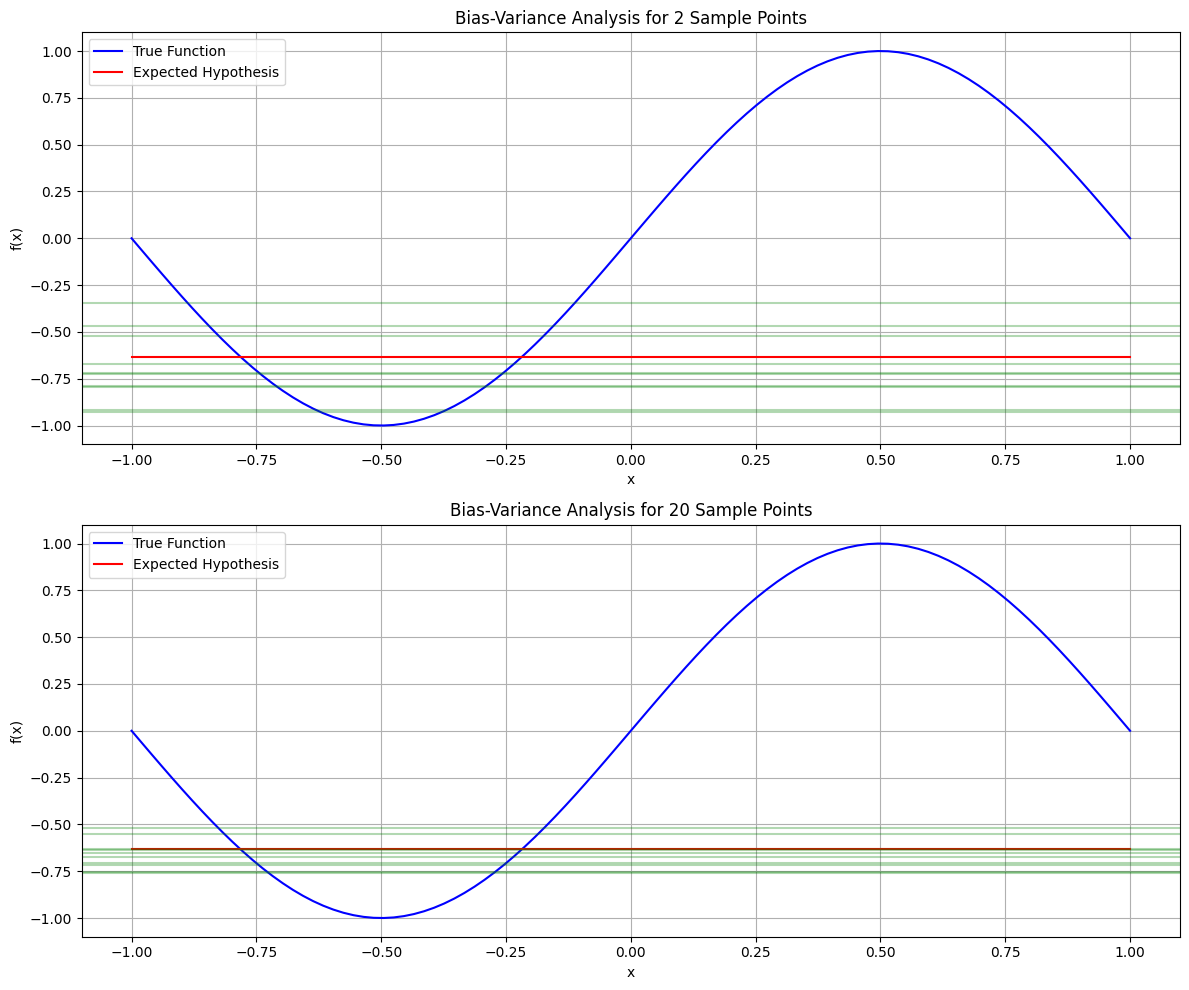

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Target function f(x)
def f(x):
    return np.sin(np.pi * x)


# Generate training data
def gen_sindata(n):
    x = stats.uniform(-1, 1).rvs(n)  # Generate n random points in [-1, 1]
    y = np.sin(np.pi * x)            # Calculate sin values for these points
    return x, y

# Hypothesis function returns the average of sin values (horizontal line)
def hypothesis(x):
    return np.mean(np.sin(np.pi * x))

# Bias calculation
def compute_bias(n_points, n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # Test points
    f_x = f(x_test)                   # True target function values
    g_bar = np.zeros_like(f_x)        # Store expected hypothesis
    
    # Generate multiple datasets and calculate expected hypothesis
    for _ in range(n_samples):
        x = gen_sindata(n_points)[0]  # Get training data points
        g_d = hypothesis(x)           # Hypothesis based on this dataset
        g_bar += g_d                  # Accumulate hypotheses
    
    g_bar /= n_samples                # Calculate expected hypothesis
    
    # Calculate Bias: squared difference between expected hypothesis and true target function
    bias = np.mean((g_bar - f_x) ** 2)
    return bias, g_bar

# Variance calculation
def compute_variance(n_points, n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # Test points
    g_bar = np.zeros_like(x_test)     # Store expected hypothesis
    
    # Generate multiple datasets to calculate expected hypothesis
    for _ in range(n_samples):
        x = gen_sindata(n_points)[0]  # Get training data points
        g_d = hypothesis(x)           # Hypothesis based on this dataset
        g_bar += g_d                  # Accumulate hypotheses
    
    g_bar /= n_samples                # Calculate expected hypothesis
    
    variances = []                    # Store variances for each dataset
    
    # Generate multiple datasets and calculate hypothesis variance
    for _ in range(n_samples):
        x = gen_sindata(n_points)[0]  # Get training data points
        g_d = hypothesis(x)           # Hypothesis based on this dataset
        
        variances.append((g_d - g_bar.mean()) ** 2)  # Calculate squared difference between hypothesis and expected hypothesis
    
    return np.mean(variances)

# Calculate and print Bias and Variance for different numbers of sample points
n_points = [2, 20]

plt.figure(figsize=(12, 10))

for i, n in enumerate(n_points):
    bias, g_bar = compute_bias(n)
    variance = compute_variance(n)
    
    print(f"For {n} sample points:")
    print(f"Bias: {bias:.3f}")
    print(f"Variance: {variance:.3f}")
    print()

    # Visualization
    x_test = np.linspace(-1, 1, 100)
    f_x = f(x_test)

    plt.subplot(2, 1, i+1)
    plt.plot(x_test, f_x, 'b-', label='True Function')
    plt.plot(x_test, g_bar, 'r-', label='Expected Hypothesis')
    
    # Generate and plot some sample hypotheses
    for _ in range(10):
        x = gen_sindata(n)[0]
        h = hypothesis(x)
        plt.axhline(y = h, color = 'g', alpha = 0.3)

    plt.title(f'Bias-Variance Analysis for {n} Sample Points')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
import numpy as np
from scipy import stats

# Target function f(x)
def f(x):
    return np.sin(np.pi * x)

# Generate training data
def gen_sindata(n):
    x = stats.uniform(-1, 1).rvs(n)  # Generate n random points in [-1, 1]
    y = np.sin(np.pi * x)            # Calculate sine values for these points
    return x, y

# Hypothesis function returns the average of sine values (horizontal line)
def hypothesis(x):
    return np.mean(np.sin(np.pi * x))

# Bias calculation
def compute_bias(n_points, n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # Test points
    f_x = f(x_test)                   # True target function values
    g_bar = np.zeros_like(f_x)        # Store expected hypothesis
    
    # Generate multiple datasets and calculate expected hypothesis
    for _ in range(n_samples):
        x = gen_sindata(n_points)[0]  # Get training data points
        g_d = hypothesis(x)           # Hypothesis based on this dataset
        g_bar += g_d                  # Accumulate hypotheses
    
    g_bar /= n_samples                # Calculate expected hypothesis
    
    # Calculate Bias: squared difference between expected hypothesis and true target function
    bias = np.mean((g_bar - f_x) ** 2)
    return bias

# Variance calculation
def compute_variance(n_points, n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # Test points
    g_bar = np.zeros_like(x_test)     # Store expected hypothesis
    
    # Generate multiple datasets to calculate expected hypothesis
    for _ in range(n_samples):
        x = gen_sindata(n_points)[0]  # Get training data points
        g_d = hypothesis(x)           # Hypothesis based on this dataset
        g_bar += g_d                  # Accumulate hypotheses
    
    g_bar /= n_samples                # Calculate expected hypothesis
    
    variances = []                    # Store variances for each dataset
    
    # Generate multiple datasets and calculate hypothesis variance
    for _ in range(n_samples):
        x = gen_sindata(n_points)[0]  # Get training data points
        g_d = hypothesis(x)           # Hypothesis based on this dataset
        
        variances.append((g_d - g_bar.mean()) ** 2)  # Calculate squared difference between hypothesis and expected hypothesis
    
    return np.mean(variances)

# Calculate and print Bias and Variance for different numbers of sample points
n_points = [2, 20]

for n in n_points:
    bias = compute_bias(n)
    variance = compute_variance(n)
    
    print(f"for {n} point:")
    print(f"Bias: {bias:.3f}")
    print(f"Variance: {variance:.3f}")
    print()

for 2 point:
Bias: 0.888
Variance: 0.048

for 20 point:
Bias: 0.901
Variance: 0.005



In [11]:
import numpy as np
from scipy import stats

# 目標函數 f(x)
def f(x):
    return np.sin(np.pi * x)

# 生成訓練資料
def gen_sindata(n=2):
    x = stats.uniform(-1, 1).rvs(n)  # 在 [-1, 1] 生成 n 個隨機點
    y = np.sin(np.pi * x)            # 計算這些點的正弦值
    return x, y

# 學習演算法返回的假設是兩個正弦值的平均 (水平線)
def hypothesis(x1, x2):
    return (np.sin(np.pi * x1) + np.sin(np.pi * x2)) / 2

# Bias 計算
def compute_bias(n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # 測試點
    f_x = f(x_test)                   # 真實的目標函數值
    g_bar = np.zeros_like(f_x)        # 存放期望的假設
    
    # 生成多組資料集並計算期望假設
    for _ in range(n_samples):
        x1, x2 = gen_sindata(2)[0]    # 取得訓練資料點
        g_d = hypothesis(x1, x2)      # 基於這組資料集的假設
        g_bar += g_d                  # 將假設累加
    
    g_bar /= n_samples                # 計算期望假設
    
    # 計算 Bias：期望假設與真實目標函數之間的差異平方
    bias = np.mean((g_bar - f_x) ** 2)
    return bias

# Variance 計算
def compute_variance(n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # 測試點
    g_bar = np.zeros_like(x_test)     # 存放期望的假設
    
    # 生成多組資料集來計算期望假設
    for _ in range(n_samples):
        x1, x2 = gen_sindata(2)[0]    # 取得訓練資料點
        g_d = hypothesis(x1, x2)      # 基於這組資料集的假設
        g_bar += g_d                  # 將假設累加
    
    g_bar /= n_samples                # 計算期望假設
    
    variances = []                    # 用來存放每次資料集的方差
    
    # 生成多組資料集並計算每次的假設變異
    for _ in range(n_samples):
        x1, x2 = gen_sindata(2)[0]    # 取得訓練資料點
        g_d = hypothesis(x1, x2)      # 基於這組資料集的假設
        
        variances.append((g_d - g_bar.mean()) ** 2)  # 計算每次假設與期望假設的差異平方
    
    return np.mean(variances)

# 計算並輸出 Bias 和 Variance
bias = compute_bias()
variance = compute_variance()

print(f"Bias: {bias}")
print(f"Variance: {variance}")

Bias: 0.8995507072322309
Variance: 0.04796486453535912


In [10]:
import numpy as np
from scipy import stats

# 目標函數 f(x)
def f(x):
    return np.sin(np.pi * x)

# 生成訓練資料
def gen_sindata(n=20):
    x = stats.uniform(-1, 1).rvs(n)  # 在 [-1, 1] 生成 n 個隨機點
    y = np.sin(np.pi * x)            # 計算這些點的正弦值
    return x, y

# 學習演算法返回的假設是 20 個正弦值的平均 (水平線)
def hypothesis(x):
    return np.mean(np.sin(np.pi * x))  # 將 20 個樣本點的正弦值平均

# Bias 計算
def compute_bias(n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # 測試點
    f_x = f(x_test)                   # 真實的目標函數值
    g_bar = np.zeros_like(f_x)        # 存放期望的假設
    
    # 生成多組資料集並計算期望假設
    for _ in range(n_samples):
        x, _ = gen_sindata(20)        # 取得 20 個訓練資料點
        g_d = hypothesis(x)           # 基於這組資料集的假設
        g_bar += g_d                  # 將假設累加
    
    g_bar /= n_samples                # 計算期望假設
    
    # 計算 Bias：期望假設與真實目標函數之間的差異平方
    bias = np.mean((g_bar - f_x) ** 2)
    return bias

# Variance 計算
def compute_variance(n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # 測試點
    g_bar = np.zeros_like(x_test)     # 存放期望的假設
    
    # 生成多組資料集來計算期望假設
    for _ in range(n_samples):
        x, _ = gen_sindata(20)        # 取得 20 個訓練資料點
        g_d = hypothesis(x)           # 基於這組資料集的假設
        g_bar += g_d                  # 將假設累加
    
    g_bar /= n_samples                # 計算期望假設
    
    variances = []                    # 用來存放每次資料集的方差
    
    # 生成多組資料集並計算每次的假設變異
    for _ in range(n_samples):
        x, _ = gen_sindata(20)        # 取得 20 個訓練資料點
        g_d = hypothesis(x)           # 基於這組資料集的假設
        
        variances.append((g_d - g_bar.mean()) ** 2)  # 計算每次假設與期望假設的差異平方
    
    return np.mean(variances)

# 計算並輸出 Bias 和 Variance
bias = compute_bias()
variance = compute_variance()

print(f"Bias: {bias}")
print(f"Variance: {variance}")

Bias: 0.9007908632924064
Variance: 0.004463539666478852


Bias: 0.8995507072322309
Variance: 0.04796486453535912


Bias: 0.9007908632924064
Variance: 0.004463539666478852


當你增加樣本點數從 2 到 20，而 **Bias** 和 **Variance** 沒有明顯差異，可能有以下幾個原因：

### 1. **Hypothesis Set 的簡單性**
在這個問題中，假設集（hypothesis set）由所有 **水平線** 組成，也就是所有的假設函數都是一條水平線 \( h(x) = b \)，其中 \( b \) 是某個常數。這是一個非常簡單的模型，無法很好地捕捉目標函數 \( f(x) = \sin(\pi x) \) 的波動，因為 \( \sin(\pi x) \) 是一個高度非線性且波動的函數。

因此，無論樣本點是 2 個還是 20 個，模型的結構決定了它始終只是在嘗試找到一個與整個數據集平均值最接近的水平線。這導致了模型的 **Bias** 無法顯著降低，因為它始終無法準確擬合 \( \sin(\pi x) \) 的非線性波動。

### 2. **Bias 主導了誤差**
**Bias** 是衡量模型無法準確捕捉真實目標函數的系統性誤差。在這個問題中，因為目標函數是非線性的，而假設集限制在水平線上，這就決定了模型無法逼近 \( f(x) = \sin(\pi x) \) 的形狀。因此，無論樣本數量是 2 還是 20，系統性的誤差（Bias）主要由模型的限制決定，不會隨著樣本數量的增加顯著減少。

### 3. **Variance 隨樣本增加而下降**
從結果來看，**Variance** 隨著樣本數的增加而顯著減少，這是因為當樣本數增加時，模型對於不同訓練資料集的敏感度會降低，這使得每次得到的水平線會更接近於期望的值 \( g(x) \)。樣本點越多，模型對於不同訓練資料集的變異越小，這是符合預期的。

### 4. **Bias 和 Variance 之間的權衡**
即使樣本數量增加，因為假設集的簡單性，**Bias** 幾乎不變，而 **Variance** 明顯降低。這表明增加樣本數有助於降低模型的波動（Variance），但無法顯著降低模型的系統性誤差（Bias），這正是模型過於簡單的結果。

### 總結：
- **Bias** 大多由模型的假設集決定，由於假設集是所有的水平線，模型無法很好地擬合目標函數的非線性部分，無論是 2 個還是 20 個樣本點，Bias 變化不大。
- **Variance** 則隨著樣本數增加而減少，這是因為更多的樣本點能讓模型的估計更加穩定，減少了對不同資料集的敏感度。

如果希望顯著降低 **Bias**，需要更複雜的假設集，比如考慮非線性模型，而不是只使用水平線。

For 2 points:
Bias: 0.753970
Variance: 0.083175

For 20 points:
Bias: 0.524385
Variance: 0.008205

Expected out-of-sample error (2 points): 0.837145
Expected out-of-sample error (20 points): 0.532590


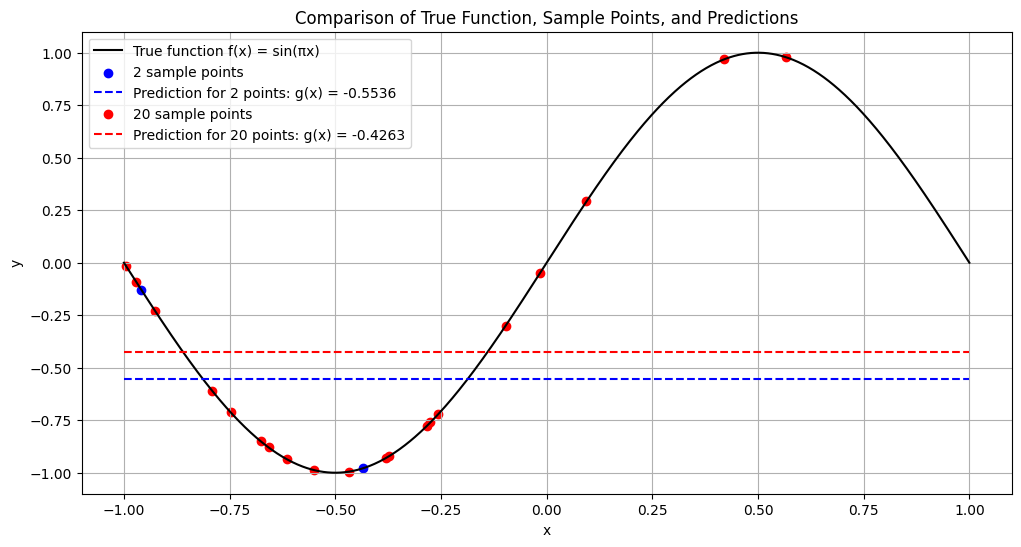

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
def generate_data(n):
    x = np.random.uniform(-1, 1, n)
    return x

# Calculate b (prediction)
def calculate_b(x):
    return np.mean(np.sin(np.pi * x))

# Calculate bias and variance
def calculate_bias_variance(n_points, n_simulations=100000):
    bias_sum = 0
    variance_sum = 0
    
    for _ in range(n_simulations):
        x = generate_data(n_points)
        b = calculate_b(x)
        
        # Calculate bias
        x_test = np.random.uniform(-1, 1)
        bias = (b - np.sin(np.pi * x_test))**2
        bias_sum += bias
        
        # Calculate variance
        variance = (b * x_test)**2
        variance_sum += variance
    
    return bias_sum / n_simulations, variance_sum / n_simulations

# Calculate for 2 points
bias_2, variance_2 = calculate_bias_variance(2)
print(f"For 2 points:")
print(f"Bias: {bias_2:.6f}")
print(f"Variance: {variance_2:.6f}")

# Calculate for 20 points
bias_20, variance_20 = calculate_bias_variance(20)
print(f"\nFor 20 points:")
print(f"Bias: {bias_20:.6f}")
print(f"Variance: {variance_20:.6f}")

# Calculate expected out-of-sample error
out_of_sample_error_2 = bias_2 + variance_2
out_of_sample_error_20 = bias_20 + variance_20

print(f"\nExpected out-of-sample error (2 points): {out_of_sample_error_2:.6f}")
print(f"Expected out-of-sample error (20 points): {out_of_sample_error_20:.6f}")

# Visualize results
def plot_results():
    x = np.linspace(-1, 1, 1000)
    y_true = np.sin(np.pi * x)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, y_true, label='True function f(x) = sin(πx)', color='black')
    
    for n_points, color in zip([2, 20], ['blue', 'red']):
        x_sample = generate_data(n_points)
        b = calculate_b(x_sample)
        y_pred = np.full_like(x, b)
        
        plt.scatter(x_sample, np.sin(np.pi * x_sample), label=f'{n_points} sample points', color=color)
        plt.plot(x, y_pred, '--', label=f'Prediction for {n_points} points: g(x) = {b:.4f}', color=color)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparison of True Function, Sample Points, and Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results()


In [2]:
import numpy as np
from scipy import stats

# Target function
def f(x):
    return np.sin(np.pi * x)

# Generate training data
def gen_sindata(n=2):
    x = stats.uniform(-1, 1).rvs(n)  # generate n random points in [-1, 1]
    y = np.sin(np.pi * x)            # sine values for those points
    return x, y

# Learning algorithm returns the midpoint hypothesis (constant hypothesis)
def hypothesis(x1, x2):
    return (np.sin(np.pi * x1) + np.sin(np.pi * x2)) / 2

# Bias calculation
def compute_bias(n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # Test points
    f_x = f(x_test)
    g_bar = np.zeros_like(x_test)     # Expected hypothesis
    
    # Generate multiple datasets and calculate the average hypothesis
    for _ in range(n_samples):
        x1, x2 = gen_sindata(2)[0]    # Get training points
        g_d = hypothesis(x1, x2)      # Hypothesis based on this dataset
        g_bar += g_d                  # Summing hypotheses over all datasets
    
    g_bar /= n_samples                # Take the average hypothesis
    
    # Calculate bias at each test point
    bias = np.mean((g_bar - f_x) ** 2)
    return bias

# Variance calculation
def compute_variance(n_samples=1000):
    x_test = np.linspace(-1, 1, 100)  # Test points
    f_x = f(x_test)
    
    variances = []
    
    # Generate multiple datasets
    for _ in range(n_samples):
        x1, x2 = gen_sindata(2)[0]    # Get training points
        g_d = hypothesis(x1, x2)      # Hypothesis based on this dataset
        
        variances.append((g_d - f_x.mean()) ** 2)
    
    return np.mean(variances)

# Run bias and variance calculation
bias = compute_bias()
variance = compute_variance()

print(f"Bias: {bias}")
print(f"Variance: {variance}")

Bias: 0.8964622744611158
Variance: 0.44858713040821563


For 2 points:
Bias: 0.747803
Variance: 0.082864

For 20 points:
Bias: 0.526436
Variance: 0.008322

Expected out-of-sample error (2 points): 0.830667
Expected out-of-sample error (20 points): 0.534758


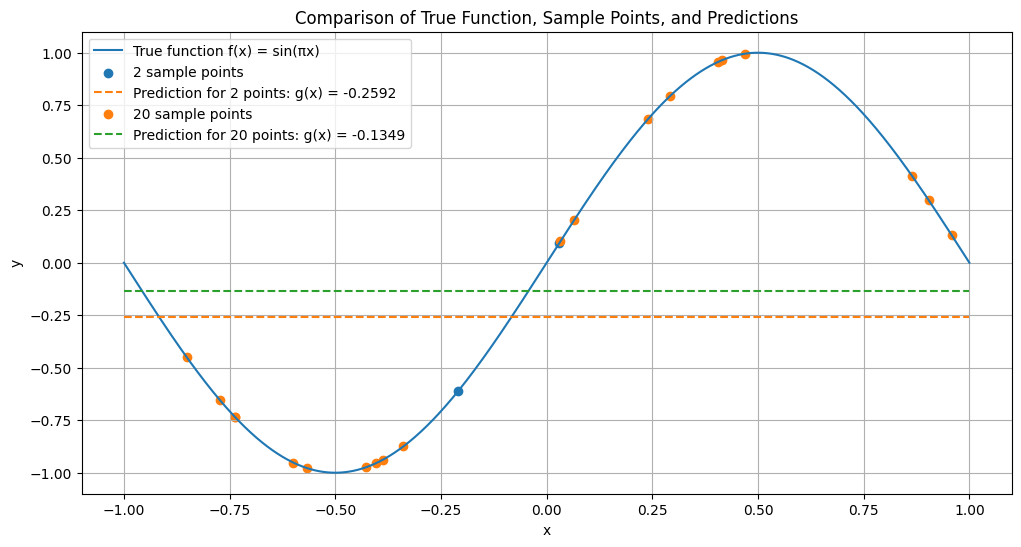

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
def generate_data(n):
    x = np.random.uniform(-1, 1, n)
    return x

# Calculate b (prediction)
def calculate_b(x):
    return np.mean(np.sin(np.pi * x))

# Calculate bias and variance
def calculate_bias_variance(n_points, n_simulations=100000):
    bias_sum = 0
    variance_sum = 0
    
    for _ in range(n_simulations):
        x = generate_data(n_points)
        b = calculate_b(x)
        
        # Calculate bias
        x_test = np.random.uniform(-1, 1)
        bias = (b - np.sin(np.pi * x_test))**2
        bias_sum += bias
        
        # Calculate variance
        variance = (b * x_test)**2
        variance_sum += variance
    
    return bias_sum / n_simulations, variance_sum / n_simulations

# Calculate for 2 points
bias_2, variance_2 = calculate_bias_variance(2)
print(f"For 2 points:")
print(f"Bias: {bias_2:.6f}")
print(f"Variance: {variance_2:.6f}")

# Calculate for 20 points
bias_20, variance_20 = calculate_bias_variance(20)
print(f"\nFor 20 points:")
print(f"Bias: {bias_20:.6f}")
print(f"Variance: {variance_20:.6f}")

# Calculate expected out-of-sample error
out_of_sample_error_2 = bias_2 + variance_2
out_of_sample_error_20 = bias_20 + variance_20

print(f"\nExpected out-of-sample error (2 points): {out_of_sample_error_2:.6f}")
print(f"Expected out-of-sample error (20 points): {out_of_sample_error_20:.6f}")

# Visualize results
def plot_results():
    x = np.linspace(-1, 1, 1000)
    y_true = np.sin(np.pi * x)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, y_true, label='True function f(x) = sin(πx)')
    
    for n_points in [2, 20]:
        x_sample = generate_data(n_points)
        b = calculate_b(x_sample)
        y_pred = np.full_like(x, b)
        
        plt.scatter(x_sample, np.sin(np.pi * x_sample), label=f'{n_points} sample points')
        plt.plot(x, y_pred, '--', label=f'Prediction for {n_points} points: g(x) = {b:.4f}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparison of True Function, Sample Points, and Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results()

For 2 points:
Bias: 0.249912
Variance: 0.000000

For 20 points:
Bias: 0.025163
Variance: 0.000000


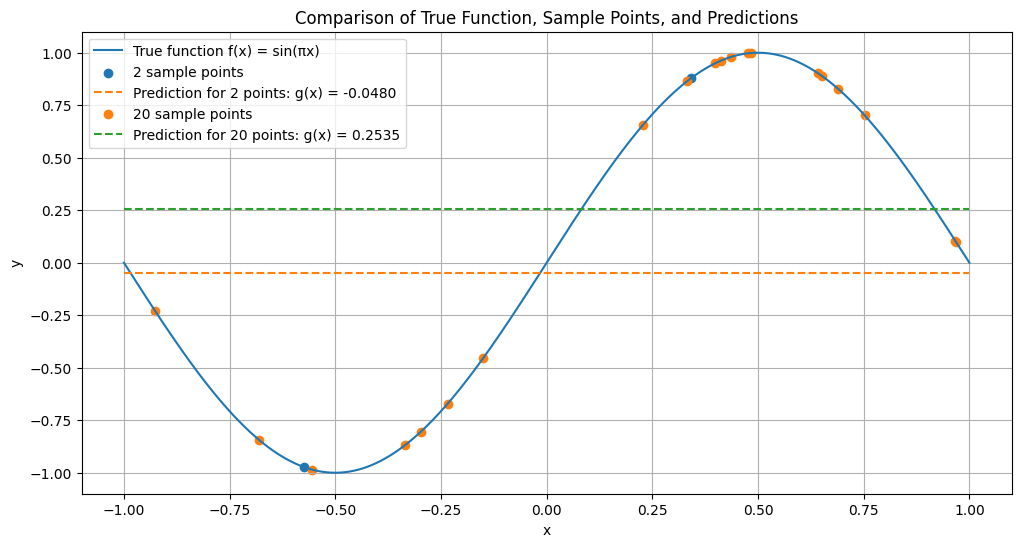

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
def generate_data(n):
    x = np.random.uniform(-1, 1, n)
    y = np.sin(np.pi * x)
    return x, y

# Calculate b (prediction)
def calculate_b(x, y):
    return np.mean(y)


# Calculate bias and variance (for both 2 and 20 points)
def calculate_bias_variance(n_points, n_simulations=10000):
    bias_sum = 0
    variance_sum = 0
    
    for _ in range(n_simulations):
        x, y = generate_data(n_points)
        b = calculate_b(x, y)
        
        # Calculate bias
        x_test = np.linspace(-1, 1, 1000)
        y_true = np.sin(np.pi * x_test)
        y_pred = np.full_like(x_test, b)
        bias = np.mean(y_pred - y_true)
        bias_sum += bias**2
        
        # Calculate variance
        variance = np.mean((y_pred - b)**2)
        variance_sum += variance
    
    return bias_sum / n_simulations, variance_sum / n_simulations

# Calculate for 2 points
bias_2, variance_2 = calculate_bias_variance(2)
print(f"For 2 points:")
print(f"Bias: {bias_2:.6f}")
print(f"Variance: {variance_2:.6f}")

# Calculate for 20 points
bias_20, variance_20 = calculate_bias_variance(20)
print(f"\nFor 20 points:")
print(f"Bias: {bias_20:.6f}")
print(f"Variance: {variance_20:.6f}")

# # Calculate expected out-of-sample error
# out_of_sample_error_2 = bias_2 + variance_2
# out_of_sample_error_20 = bias_20 + variance_20

# print(f"\nExpected out-of-sample error (2 points): {out_of_sample_error_2:.6f}")
# print(f"Expected out-of-sample error (20 points): {out_of_sample_error_20:.6f}")

# Visualize results
def plot_results():
    x = np.linspace(-1, 1, 1000)
    y_true = np.sin(np.pi * x)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, y_true, label='True function f(x) = sin(πx)')
    
    for n_points in [2, 20]:
        x_sample, y_sample = generate_data(n_points)
        b = calculate_b(x_sample, y_sample)
        y_pred = np.full_like(x, b)
        
        plt.scatter(x_sample, y_sample, label=f'{n_points} sample points')
        plt.plot(x, y_pred, '--', label=f'Prediction for {n_points} points: g(x) = {b:.4f}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparison of True Function, Sample Points, and Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results()

Part (a) - Bias: 0.868, Variance: 0.000
Part (b) - Bias: 0.516, Variance: 0.000


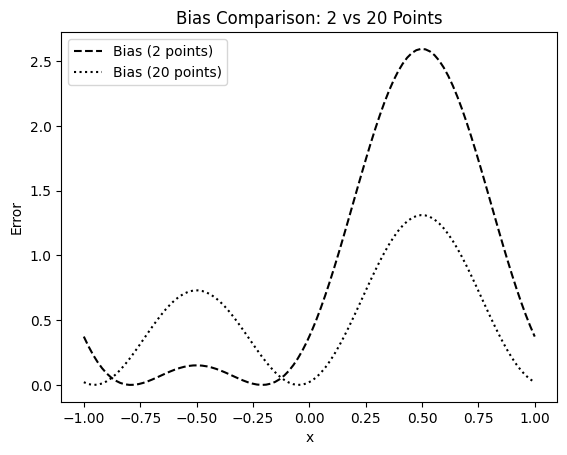

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function f(x) = sin(πx)
def target_function(x):
    return np.sin(np.pi * x)

# Part (a): Train on two data points
# Set two random points x1, x2 uniformly distributed in [-1, 1]
x1, x2 = np.random.uniform(-1, 1, 2)

# Calculate the average hypothesis (g(D)) as the midpoint
g_D = (target_function(x1) + target_function(x2)) / 2

# Part (a): Bias and Variance for two points
# For the hypothesis h(x) = b, where b = g(D)
def bias_variance_for_two_points(x_points):
    bias = 0
    variance = 0
    for x in x_points:
        # Bias: (g(D) - f(x))^2
        bias += (g_D - target_function(x)) ** 2
        # Variance: As we only use a horizontal line hypothesis, variance is zero
    bias /= len(x_points)
    variance = 0
    return bias, variance

# Generate test points to compute bias and variance over [-1, 1]
test_points = np.linspace(-1, 1, 100)
bias_a, var_a = bias_variance_for_two_points(test_points)

# Part (b): Train on 20 data points
# Generate 20 random points uniformly distributed in [-1, 1]
x_train_20 = np.random.uniform(-1, 1, 20)

# Calculate g(D) for the 20 points as the average of f(x) over those points
g_D_20 = np.mean(target_function(x_train_20))

# Part (b): Bias and Variance for 20 points
def bias_variance_for_20_points(x_points):
    bias = 0
    variance = 0
    for x in x_points:
        # Bias: (g(D) - f(x))^2
        bias += (g_D_20 - target_function(x)) ** 2
        # Variance remains zero as hypothesis is a constant line
    bias /= len(x_points)
    variance = 0
    return bias, variance

# Compute bias and variance for the 20-point training set
bias_b, var_b = bias_variance_for_20_points(test_points)

# Display results
print(f"Part (a) - Bias: {bias_a:.3f}, Variance: {var_a:.3f}")
print(f"Part (b) - Bias: {bias_b:.3f}, Variance: {var_b:.3f}")

# Plot results for visualization
xi = np.linspace(-1, 1, 100)
yi = target_function(xi)

plt.plot(xi, (g_D - yi)**2, '--k', label='Bias (2 points)')
plt.plot(xi, (g_D_20 - yi)**2, ':k', label='Bias (20 points)')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Bias Comparison: 2 vs 20 Points')
plt.show()
